In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt
import numpy as np

# Univariate distributions [tensorflow_probability]

```python
[Example]

# 1. distribution initialization
normal = tfd.Normal(loc=0, scale=1.0)
bern = tfd.Bernoulli(probs=0.7), tfd.Bernoulli(logits=0.7)

#2. sampling
normal.sample('shape')
bern.sample('shape')

#3. get probability(pdf value) of distribution
normal.prob(x : random variable value)
bern.prob(x : random variable value)

#4. get log probability(pdf value) of distribution
normal.log_prob(x : random variable value)
bern.log_prob(x : random variable value)

#5. batched_distribution

```

## Normal

### initialization

In [3]:
# loc : mean
# scale : std
normal = tfd.Normal(loc=0., scale=1.0)

In [4]:
# event_shape : Random variable의 차원(dimensionality)
### 현재는 단변량(scalar tensor)이기에, event_shape가 비어있음
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


### sampling

```
normal.sample(args='shape')
```

In [5]:
# if we call 'sample()' with no args, then it will return a single sample.
# args : shape
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=-0.40037122>

In [6]:
normal.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.27367365, -1.1364852 ,  1.7111229 ], dtype=float32)>

In [7]:
normal.sample((3,2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.61710346, -0.33045092],
       [ 1.1185087 ,  1.2636777 ],
       [ 0.34677982, -0.30937165]], dtype=float32)>

normal_samples :
 [[-0.3991576   2.1044393 ]
 [ 0.17107224  0.54651815]
 [-2.4234028   0.422554  ]
 [ 0.28943786 -0.5043041 ]]


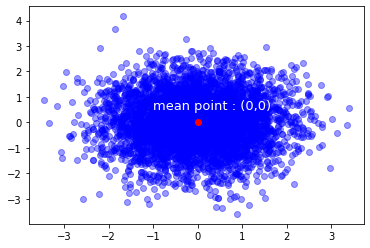

In [8]:
normal_samples_2d = normal.sample((5000,2), seed=0)
print(f"normal_samples :\n {normal_samples_2d[:4]}")

plt.scatter(normal_samples_2d[:,0], normal_samples_2d[:,1], color='blue', alpha=0.4)
plt.scatter(0,0, color='red')
plt.text(-1,0.5, "mean point : (0,0)", fontsize=13, color='white')
plt.title("")
plt.show()

### prob value

- return probability value(pdf)

```
normal.prob(0.5) 

>> return pdf value of '0.5'
```

In [9]:
normal.prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.35206532>

In [10]:
x = np.linspace(-2,2,num=100)
print(len(x))

100


In [11]:
pdfs = normal.prob(x)
print(len(pdfs))

100


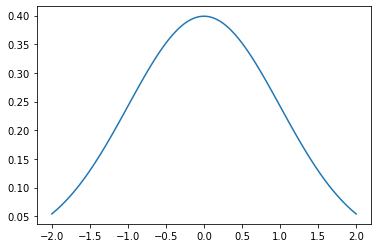

In [12]:
plt.plot(x, pdfs)
plt.show()

### log prob value

- return log probability value(pdf)

```
normal.log_prob(0.5) 

>> return log(pdf value of '0.5')
```

In [13]:
normal.log_prob(0.5)

<tf.Tensor: shape=(), dtype=float32, numpy=-1.0439385>

In [14]:
log_pdfs = normal.log_prob(x)

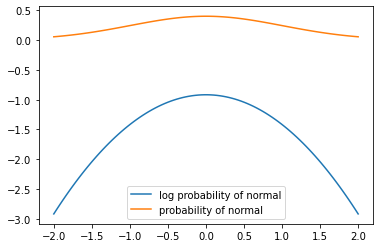

In [15]:
plt.plot(x, log_pdfs, label='log probability of normal')
plt.plot(x, pdfs, label='probability of normal')
plt.legend()
plt.show()

In [16]:
# max value of pdf = 0.39886087
# max vlaue of log pdf = -0.9191426 = log(0.39886087)
np.log(max(pdfs).numpy())

-0.9191426

## Bernoulli

In [17]:
# args 'probs' : probability to win (binary event : win or lose) 
bern = tfd.Bernoulli(probs=0.7)
print(bern)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)


In [131]:
# sigmoid(logit) = 확률값 (0~1)
# bernoulli분포의 'probs'(확률값)을 sigmoid function의 logit값으로 대신 입력해줄 수 있음. 이 때 사용하는 args가 'logits'
# logits=0.7 ===>>> the log-odds(logit) of sampling '1'
### 0 <= sigmoid(logit) <= 1, -inf < logit < inf
### logit 설명 : https://haje01.github.io/2019/11/19/logit.html

bern = tfd.Bernoulli(logits=0.7)
print(bern)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)


In [19]:
def sigmoid(x):
    return  1 / (1 +np.exp(-x))

sigmoid(0.7)

0.6681877721681662

In [21]:
bern.sample(3)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 0, 1], dtype=int32)>

In [130]:
bern.prob(1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6681878>

In [27]:
print(bern.log_prob(1))
print(f"log of probability(1) : {np.log(bern.prob(1))}")

tf.Tensor(-0.40318605, shape=(), dtype=float32)
log of probability(1) : -0.40318599343299866


## "batch_shape"

```python
만약 tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32) 라면,
2개의 bernoulli 분포를 생성한 것과 같다. 말 그대로 분포의 batch가 2개인 것.
마치 샘플을 2개 뽑는 것과 헷갈릴 수 있지만, 그게 아니다.
샘플을 2개 뽑으려면, tfd.Bernoulli.sample(2) 가 되어야 한다.
```

In [28]:
batched_bernoulli = tfd.Bernoulli(probs=[0.4, 0.5])
print(batched_bernoulli)

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[2], event_shape=[], dtype=int32)


In [29]:
batched_bernoulli.batch_shape

TensorShape([2])

### bernoulli batch의 sampling

In [42]:
batched_bernoulli.sample(5, seed=0)

<tf.Tensor: shape=(5, 2), dtype=int32, numpy=
array([[0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1]], dtype=int32)>

In [43]:
bern.sample(5, seed=0)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 0, 1], dtype=int32)>

### bernoulli batch의 probability value, log-probability value

In [44]:
batched_bernoulli.prob([1,0])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4, 0.5], dtype=float32)>

In [45]:
batched_bernoulli.log_prob([1,0])

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-0.9162907, -0.6931472], dtype=float32)>

### normal batch

In [47]:
batched_normal = tfd.Normal(loc=[0.0, 1.0, 10.0], scale=[1.0, 10.0, 20.0])

In [110]:
loc_batch_shape = [[0.0, 1.0, 2.0],
                   [3.0, 4.0, 5.0]]
scale_batch_shape = [[1.0, 2.0, 3.0],
                     [4.0, 5.0, 6.0]]
batched_normal_2 = tfd.Normal(loc=loc_batch_shape, scale=scale_batch_shape)
batched_normal_2

<tfp.distributions.Normal 'Normal' batch_shape=[2, 3] event_shape=[] dtype=float32>

### normal batch의 sampling

In [48]:
batched_normal.sample(5, seed=0)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ -0.5772605 ,  -7.0837307 ,   3.888732  ],
       [  0.5360802 ,  -8.70456   ,  30.361252  ],
       [ -0.68598086, -25.656687  ,  -7.2764244 ],
       [ -0.80868995,   1.5257695 ,   3.5167894 ],
       [ -0.21128194,  -7.2441235 ,   6.9079065 ]], dtype=float32)>

In [49]:
normal.sample(5, seed=0)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.84831023, 2.4484408 , 1.548564  , 0.8814812 , 0.45576122],
      dtype=float32)>

In [113]:
batched_normal_2.sample(5, seed=0)

<tf.Tensor: shape=(5, 2, 3), dtype=float32, numpy=
array([[[-1.7541924 , -1.376013  , -0.33197737],
        [ 6.2060204 ,  3.4979808 ,  4.5852814 ]],

       [[-1.6639787 ,  0.30200064,  5.9963307 ],
        [ 7.1548963 ,  7.0340967 ,  0.05000544]],

       [[-0.52905667, -1.3180041 ,  2.166674  ],
        [ 6.260161  ,  6.5899124 , 14.884328  ]],

       [[-0.32604373, -1.3193591 ,  3.9169247 ],
        [ 5.796978  ,  9.928562  ,  6.193222  ]],

       [[ 0.29986295,  0.12861407,  5.2345457 ],
        [ 7.6775527 , 11.294971  ,  0.8986654 ]]], dtype=float32)>

### normal batch의 probability value, log-probability value

In [50]:
batched_normal.prob([10, 20])

InvalidArgumentError: Incompatible shapes: [2] vs. [3] [Op:RealDiv]

In [54]:
batched_normal.prob([0, 1, 10])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.3989423 , 0.03989422, 0.01994711], dtype=float32)>

In [55]:
batched_normal.log_prob([0,1,10])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.9189385, -3.2215238, -3.914671 ], dtype=float32)>

In [58]:
normal_a = batched_normal[0]
normal_b = batched_normal[1]
normal_c = batched_normal[2]

In [102]:
def plot_2d_scatter(distribution, shape):
    
    samples_2d = distribution.sample(sample_shape=shape, seed=0)
    
    mean_value = distribution.mean()
    
    plt.figure(figsize=(8,4))
    plt.scatter(samples_2d[:,0], samples_2d[:, 1], color='blue', alpha=1)
    plt.scatter(mean_value, mean_value, color='red')
    plt.text(mean_value-1, mean_value+0.5, f"mean point : ({mean_value}, {mean_value})", color='red', fontsize=15)

    plt.title(f"{distribution.name} distribution scatter plot", fontsize=15)

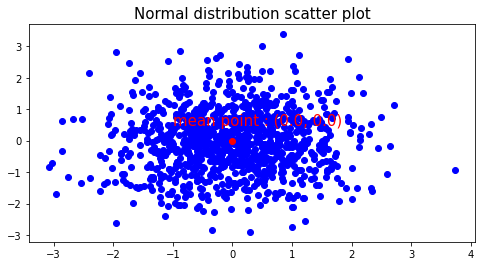

In [103]:
plot_2d_scatter(normal_a, (1000,2))

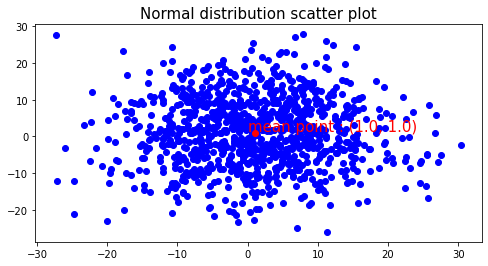

In [106]:
plot_2d_scatter(normal_b, (1000,2))

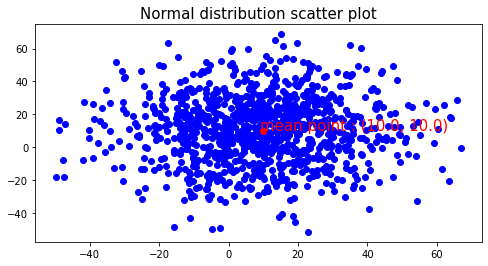

In [107]:
plot_2d_scatter(normal_c, (1000,2))